# Vaibhav Arora

# Importing Libraries

In [416]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm 


# Importing Dataset


In [417]:
url = 'https://raw.githubusercontent.com/vaib2443/ALY6020_1/1549f89329095a1ee6bbb9e18d3b35303b762744/car.csv'
df = pd.read_csv(url)
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


# Part 1: Data Cleaning

In [418]:
df.shape

(398, 8)

In [419]:
df.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
US Made         0
dtype: int64

In [420]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   US Made       398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [421]:
df.drop_duplicates()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,0
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [422]:
df['Horsepower'].value_counts().sort_index(ascending=False)


?       6
98      2
97      9
96      3
95     14
       ..
107     1
105    12
103     1
102     1
100    17
Name: Horsepower, Length: 94, dtype: int64

In [423]:
df = df.replace('?', np.nan)
df["Horsepower"] = pd.to_numeric(df["Horsepower"])

In [424]:
mean_fill = lambda x: x.fillna(x.mean())
df = df.apply(mean_fill,axis=0)

In [425]:
df["Horsepower"] = pd.to_numeric(df["Horsepower"])

In [426]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   US Made       398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


# Exploratory Data Analysis

In [427]:
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,0.625628
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.484569
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,0.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000


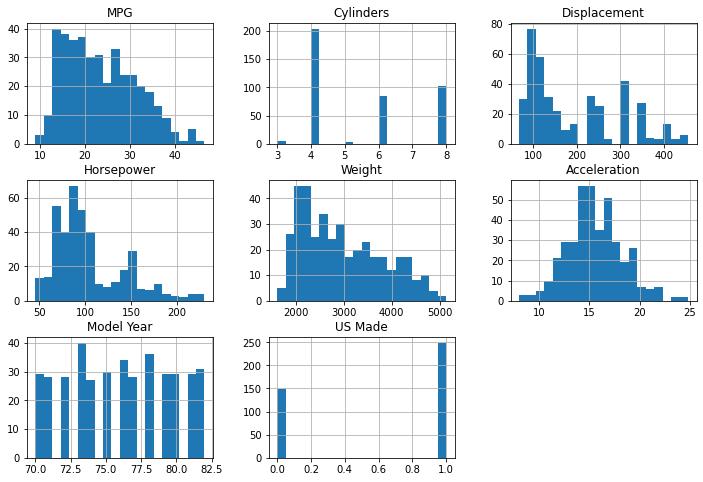

In [428]:
df.hist(figsize=(12,8),bins=20)
plt.show()

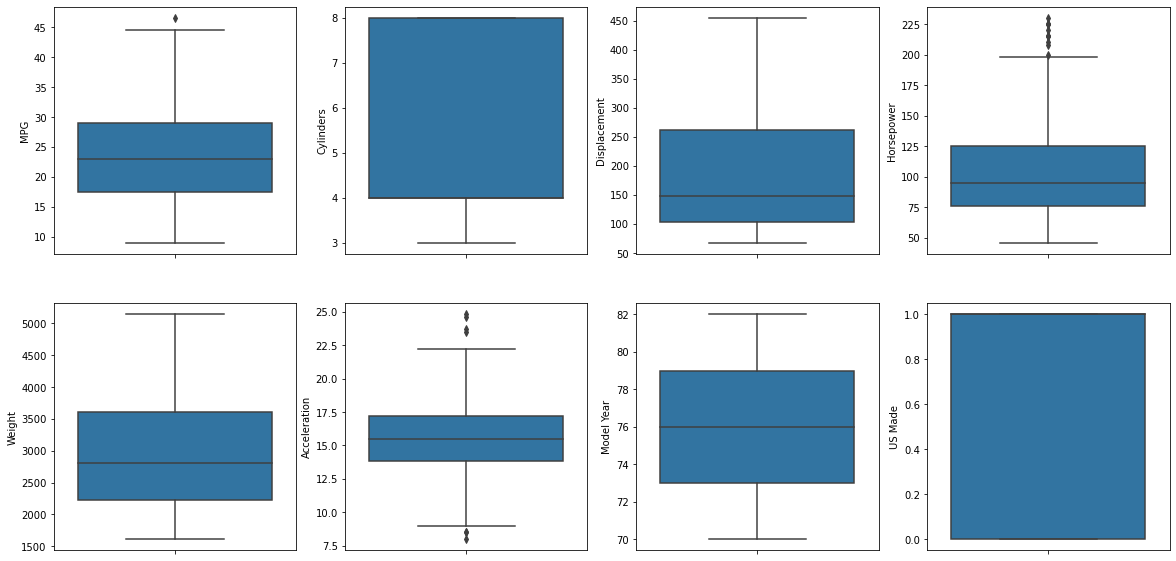

In [429]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
sns.boxplot(y='MPG',data=df)
plt.subplot(2,4,2)
sns.boxplot(y='Cylinders',data=df)
plt.subplot(2,4,3)
sns.boxplot(y='Displacement',data=df)
plt.subplot(2,4,4)
sns.boxplot(y='Horsepower',data=df)
plt.subplot(2,4,5)
sns.boxplot(y='Weight',data=df)
plt.subplot(2,4,6)
sns.boxplot(y='Acceleration',data=df)
plt.subplot(2,4,7)
sns.boxplot(y='Model Year',data=df)
plt.subplot(2,4,8)
sns.boxplot(y='US Made',data=df)
plt.show()


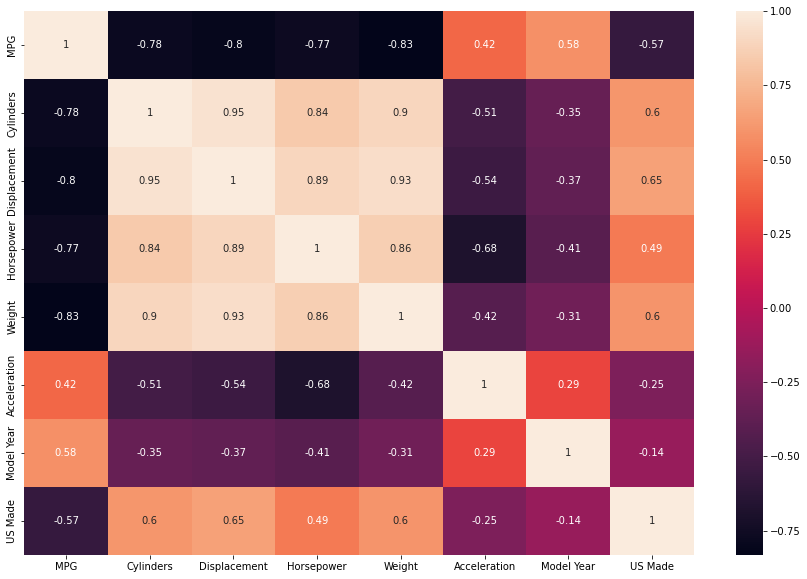

In [430]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Part 2: Building Linear Regression Model

In [431]:
x = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [432]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [448]:
cons_x=sm.add_constant(x_train)
lm=sm.OLS(y_train,cons_x).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     203.1
Date:                Thu, 06 Oct 2022   Prob (F-statistic):          9.15e-112
Time:                        19:25:11   Log-Likelihood:                -829.47
No. Observations:                 318   AIC:                             1675.
Df Residuals:                     310   BIC:                             1705.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.0705      5.102     -3.346   

/Users/vaibhavarora/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [434]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

cons = sm.tools.add_constant(df) 

vif = pd.Series([variance_inflation_factor(cons.values,i) for i in range(cons.shape[1])], index=cons.columns)

print(vif)

const           763.446231
MPG               5.696929
Cylinders        10.720660
Displacement     23.435172
Horsepower        9.043348
Weight           13.694543
Acceleration      2.512519
Model Year        2.035465
US Made           2.092441
dtype: float64


/Users/vaibhavarora/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# Part 3: Feature Selection

In [435]:
df2 = df.drop(['Weight','Displacement', 'Cylinders'],axis=1)

In [436]:
cons2 = sm.tools.add_constant(df2) 

vif2 = pd.Series([variance_inflation_factor(cons2.values,i) 
                     for i in range(cons2.shape[1])], index=cons2.columns)

print(vif2)

const           691.164414
MPG               4.020904
Horsepower        4.136177
Acceleration      2.022900
Model Year        1.663170
US Made           1.614071
dtype: float64


# Filter Method

In [437]:
x2 = df2.iloc[:, 1:]
y2 = df2.iloc[:, 0]

In [438]:
from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size = 0.2, random_state = 0)

In [439]:
cons_x2=sm.add_constant(x_train2)
lm2=sm.OLS(y_train2,cons_x2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     241.1
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           3.04e-94
Time:                        17:34:13   Log-Likelihood:                -879.35
No. Observations:                 318   AIC:                             1769.
Df Residuals:                     313   BIC:                             1788.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -8.2679      5.701     -1.450   

# Wrapper Method

# Backward Selection

In [447]:
back_col = list(x.columns)
max_p = 1
while (len(back_col)>0):
    ppx= []
    x_1 = x[back_col]
    x_1 = sm.add_constant(x_1)
    model = sm.OLS(y,x_1).fit()
    ppx = pd.Series(model.pvalues.values[1:],index = back_col)      
    max_p = max(ppx)
    feature_with_max_p = ppx.idxmax()
    if(max_p>0.05):
        back_col.remove(feature_with_max_p)
    else:
        break
backward_features = back_col
print(backward_features)

['Displacement', 'Weight', 'Acceleration', 'Model Year', 'US Made']


/Users/vaibhavarora/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/vaibhavarora/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/vaibhavarora/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [441]:
df3 = df[['MPG','Displacement', 'Weight', 'Acceleration', 'Model Year', 'US Made']]

In [442]:
x3 = df3.iloc[:, 1:]
y3 = df3.iloc[:, 0]

In [443]:
from sklearn.model_selection import train_test_split
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size = 0.2, random_state = 0)

In [445]:
cons_x3=sm.add_constant(x_train3)
lm3=sm.OLS(y_train3,cons_x3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     283.2
Date:                Thu, 06 Oct 2022   Prob (F-statistic):          1.20e-113
Time:                        17:36:16   Log-Likelihood:                -830.82
No. Observations:                 318   AIC:                             1674.
Df Residuals:                     312   BIC:                             1696.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -20.9827      4.446     -4.720   

/Users/vaibhavarora/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
